#Building a Binary Classification Model to detech Fake Social Media Account
## Lets Starting by import the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2025-12-05 13:10:19.254700: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-05 13:10:19.905496: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-05 13:10:22.545123: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
df = pd.read_excel("fake_account_dataset.xlsx")
df.tail(15)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
1185,1,0.000000,0.960175,0.000000,0,19.384719,0,1,133,281,1134,1,0.248458
1186,1,0.261636,0.914426,0.304843,0,0.000000,0,1,4,73,1287,1,0.057453
1187,1,0.000000,1.993654,0.000000,0,142.616458,1,0,161,100163,16,0,5892.000000
1188,0,0.264618,1.968561,0.000000,0,0.000000,0,0,0,38,65,1,0.590909
1189,1,0.320016,0.000000,0.000000,0,51.542555,0,1,4,850,619,1,1.372581
1190,1,0.573686,0.969091,0.000000,0,11.018795,0,0,0,58,72,1,0.808219
1191,1,0.000000,2.019406,0.000000,0,0.000000,0,0,1,62,136,1,0.459854
1192,1,0.000000,1.933735,0.000000,0,0.000000,0,1,19,526,530,0,0.992467
1193,1,0.216017,0.948534,0.231536,1,0.000000,0,1,3,45,658,1,0.069803
1194,1,0.000000,1.936574,0.000000,0,62.263575,0,0,23,220,263,0,0.837121


##Lets Know More About Our data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           1200 non-null   int64  
 1   nums/length username  1200 non-null   float64
 2   fullname words        1200 non-null   float64
 3   nums/length fullname  1200 non-null   float64
 4   name==username        1200 non-null   int64  
 5   description length    1200 non-null   float64
 6   external URL          1200 non-null   int64  
 7   private               1200 non-null   int64  
 8   #posts                1200 non-null   int64  
 9   #followers            1200 non-null   int64  
 10  #follows              1200 non-null   int64  
 11  fake                  1200 non-null   int64  
 12  follow_ratio          1200 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 122.0 KB


In [6]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1.200000e+03
mean,0.715833,0.165820,1.482086,0.040059,0.040000,24.299388,0.115000,0.366667,119.779167,8.551319e+04,560.030000,0.493333,4.051104e+03
std,0.451205,0.217660,1.069781,0.138720,0.196041,40.067729,0.319155,0.482095,470.397495,8.053278e+05,1020.750169,0.500164,6.271568e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.170960e-03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375000e+01,63.750000,0.000000,3.846154e-01
50%,1.000000,0.000000,1.001198,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,255.500000,0.000000,8.125732e-01
75%,1.000000,0.314475,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,75.250000,6.755000e+02,592.750000,1.000000,1.651489e+00
max,1.000000,0.967149,12.000000,1.068951,1.000000,158.236266,1.000000,1.000000,8172.000000,1.533854e+07,7690.000000,1.000000,1.519524e+06


In [7]:
df.isnull().sum()


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
follow_ratio            0
dtype: int64

## As we can See Here there is no null Value
### But we need to remove cols like "name==username" as it hardly matters
### And we can drop cols "nums/length fullname" as most of them are 0.0

In [8]:
df = df.drop(["name==username","nums/length fullname"],axis =1)

In [9]:
df.describe()

,profile pic,nums/length username,fullname words,description length,external URL,private,#posts,#followers,#follows,fake,follow_ratio
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1.200000e+03
mean,0.715833,0.165820,1.482086,24.299388,0.115000,0.366667,119.779167,8.551319e+04,560.030000,0.493333,4.051104e+03
std,0.451205,0.217660,1.069781,40.067729,0.319155,0.482095,470.397495,8.053278e+05,1020.750169,0.500164,6.271568e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.170960e-03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.375000e+01,63.750000,0.000000,3.846154e-01
50%,1.000000,0.000000,1.001198,0.000000,0.000000,0.000000,9.000000,1.655000e+02,255.500000,0.000000,8.125732e-01
75%,1.000000,0.314475,2.000000,35.000000,0.000000,1.000000,75.250000,6.755000e+02,592.750000,1.000000,1.651489e+00
max,1.000000,0.967149,12.000000,158.236266,1.000000,1.000000,8172.000000,1.533854e+07,7690.000000,1.000000,1.519524e+06


>From the Description we can see that 49% of the accounts in the data is fake meaning the data is split equally we can now shuffle the data for promising results
>We can Modify the data as per our needs in the future lets make our model and see how it works


##Now we have preprocessed our data to work on

###Lets Create X label and Y label

In [10]:
Y = df["fake"]
df = df.drop(["fake"],axis = 1)

In [11]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    1
1198    0
1199    0
Name: fake, Length: 1200, dtype: int64

In [12]:
X = df

In [13]:
X

,profile pic,nums/length username,fullname words,description length,external URL,private,#posts,#followers,#follows,follow_ratio
0,1,0.270000,0.000000,53.000000,0,0,32,1000,955,1.047071
1,1,0.000000,2.000000,44.000000,0,0,286,2740,533,5.132959
2,1,0.100000,2.000000,0.000000,0,1,13,159,98,1.616162
3,1,0.000000,1.000000,82.000000,0,0,679,414,651,0.636503
4,1,0.000000,2.000000,0.000000,0,1,6,151,126,1.196850
...,...,...,...,...,...,...,...,...,...,...
1195,1,0.000000,2.874912,0.000000,0,0,9,66,43,1.522727
1196,1,0.000000,0.000000,0.000000,0,1,135,890,1159,0.768103
1197,1,0.542466,0.973136,11.344382,0,0,0,57,69,0.828571
1198,1,0.000000,1.920877,63.459492,1,0,381,35842,1805,19.846622


In [14]:
X = X.values
Y = Y.values
X,Y

(array([[1.00000000e+00, 2.70000000e-01, 0.00000000e+00, ...,
         1.00000000e+03, 9.55000000e+02, 1.04707113e+00],
        [1.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
         2.74000000e+03, 5.33000000e+02, 5.13295880e+00],
        [1.00000000e+00, 1.00000000e-01, 2.00000000e+00, ...,
         1.59000000e+02, 9.80000000e+01, 1.61616162e+00],
        ...,
        [1.00000000e+00, 5.42466143e-01, 9.73136224e-01, ...,
         5.70000000e+01, 6.90000000e+01, 8.28571429e-01],
        [1.00000000e+00, 0.00000000e+00, 1.92087701e+00, ...,
         3.58420000e+04, 1.80500000e+03, 1.98466224e+01],
        [1.00000000e+00, 0.00000000e+00, 1.05243133e+00, ...,
         1.08200000e+03, 9.58000000e+02, 1.12930136e+00]], shape=(1200, 10)),
 array([0, 0, 0, ..., 1, 0, 0], shape=(1200,)))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
X_train, y_train

(array([[1.00000000e+00, 5.50000000e-01, 1.00000000e+00, ...,
         7.90000000e+01, 7.67000000e+02, 1.04166667e-01],
        [0.00000000e+00, 3.80000000e-01, 1.00000000e+00, ...,
         1.20000000e+02, 1.81000000e+02, 6.64835165e-01],
        [1.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
         4.94000000e+02, 9.98000000e+02, 4.95495495e-01],
        ...,
        [1.00000000e+00, 3.10133632e-01, 1.01881239e+00, ...,
         2.20000000e+01, 3.80000000e+01, 5.89743590e-01],
        [1.00000000e+00, 1.25357625e-01, 2.10052299e+00, ...,
         2.95391000e+05, 2.55000000e+02, 1.15387500e+03],
        [0.00000000e+00, 0.00000000e+00, 9.17865364e-01, ...,
         4.90000000e+01, 6.00000000e+00, 7.14285714e+00]], shape=(960, 10)),
 array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 

### Using Standard Scaler i Am going to Scale the data from better performance and accuracy

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:2]

array([[ 0.62393179,  1.74954615, -0.44327214, -0.60808382, -0.35973847,
         1.34731187, -0.25227667, -0.10203144,  0.2207174 , -0.06556728],
       [-1.60273929,  0.97306011, -0.44327214, -0.60808382, -0.35973847,
        -0.74221865, -0.25227667, -0.10197744, -0.36497496, -0.06555694]])

In [18]:
X_train[1]

array([-1.60273929,  0.97306011, -0.44327214, -0.60808382, -0.35973847,
       -0.74221865, -0.25227667, -0.10197744, -0.36497496, -0.06555694])

In [19]:
X_test

array([[ 0.62393179, -0.76261456, -0.44103421, ..., -0.10154275,
        -0.24803638, -0.06554138],
       [-1.60273929,  1.82149998, -0.28979007, ..., -0.10212892,
        -0.53088781, -0.06556228],
       [ 0.62393179, -0.76261456, -1.35450159, ..., -0.10205779,
        -0.49090881, -0.06554944],
       ...,
       [-1.60273929,  0.33360103, -0.44327214, ..., -0.1020894 ,
        -0.50789989, -0.06555218],
       [ 0.62393179,  0.22405587, -0.4901691 , ..., -0.10207623,
         0.11177462, -0.06556791],
       [ 0.62393179, -0.76261456, -0.46811726, ...,  0.10286939,
         0.79841396, -0.06343671]], shape=(240, 10))

### As I am Going to use tenserflow lets convert these to tensors

In [20]:
X_train = tf.convert_to_tensor(X_train,dtype = tf.float32)
X_test = tf.convert_to_tensor(X_test,dtype = tf.float32)

2025-12-05 13:12:23.254324: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
X_train

<tf.Tensor: shape=(960, 10), dtype=float32, numpy=
array([[ 0.62393177,  1.7495462 , -0.44327214, ..., -0.10203145,
         0.2207174 , -0.06556728],
       [-1.6027393 ,  0.97306013, -0.44327214, ..., -0.10197744,
        -0.36497495, -0.06555694],
       [ 0.62393177, -0.76261455,  0.4679573 , ..., -0.10148479,
         0.45159614, -0.06556007],
       ...,
       [ 0.62393177,  0.6539409 , -0.42612973, ..., -0.10210653,
        -0.5078999 , -0.06555832],
       [ 0.62393177, -0.19003546,  0.5595568 , ...,  0.28696573,
        -0.2910138 , -0.04428829],
       [-1.6027393 , -0.76261455, -0.51811564, ..., -0.10207096,
        -0.5398831 , -0.06543747]], shape=(960, 10), dtype=float32)>

In [22]:
X_test.shape, X_train.shape

(TensorShape([240, 10]), TensorShape([960, 10]))

###As We can see here Train Data has 960 rows and Test Data has 240 rows Which is a beautiful split

##Lets Create Checkpoint to store the Best Model Epoch

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model2.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

In [24]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy","recall","precision","auc"])


In [27]:
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics = ["accuracy","recall","precision","auc"])

In [28]:
history_1 = model_1.fit(X_train,y_train,epochs = 200,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8490 - auc: 0.9165 - loss: 0.4467 - precision: 0.8263 - recall: 0.8786 - val_accuracy: 0.9115 - val_auc: 0.9685 - val_loss: 0.2367 - val_precision: 0.9425 - val_recall: 0.8723
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8828 - auc: 0.9366 - loss: 0.2951 - precision: 0.9213 - recall: 0.8338 - val_accuracy: 0.9062 - val_auc: 0.9738 - val_loss: 0.2273 - val_precision: 0.9419 - val_recall: 0.8617
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8932 - auc: 0.9543 - loss: 0.2600 - precision: 0.9280 - recall: 0.8496 - val_accuracy: 0.9167 - val_auc: 0.9765 - val_loss: 0.2093 - val_precision: 0.9062 - val_recall: 0.9255
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9010 - auc: 0.9615 - loss: 0.2421 - precision: 0.9244 - recall: 0.8707 - val_accuracy: 0.9219 - val_auc: 0.9756 - val_loss: 0.1987 - val_precision: 0.9341 - val_recall: 0.9043
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━

In [29]:
history_2 = model_2.fit(X_train,y_train,epochs = 200,validation_split=0.2,callbacks=[checkpoint],verbose=1)

Epoch 1/200


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7578 - auc: 0.9078 - loss: 0.5056 - precision: 0.6911 - recall: 0.9208 - val_accuracy: 0.8906 - val_auc: 0.9607 - val_loss: 0.3233 - val_precision: 0.9195 - val_recall: 0.8511
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8828 - auc: 0.9389 - loss: 0.2910 - precision: 0.9419 - recall: 0.8127 - val_accuracy: 0.9062 - val_auc: 0.9699 - val_loss: 0.2362 - val_precision: 0.9130 - val_recall: 0.8936
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8893 - auc: 0.9577 - loss: 0.2564 - precision: 0.9249 - recall: 0.8443 - val_accuracy: 0.8958 - val_auc: 0.9743 - val_loss: 0.2107 - val_precision: 0.9111 - val_recall: 0.8723
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8971 - auc: 0.9647 - loss: 0.2365 - precision: 0.9261 - recall: 0.8602 - val_accuracy: 0.9219 - val_auc: 0.9769 - val_loss: 0.2038 - val_precision: 0.9438 - val_recall: 0.8936
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

In [31]:
model_1.save('best_model1.keras')
model_2.save('best_model2.keras')

In [32]:
best_model = tf.keras.models.load_model('best_model1.keras')
print(f" The Train Accuaracy of Model 1 is : \n{best_model.evaluate(X_train, y_train)}")
print()
print(f" The Validation Accuracy of Model 1 is : \n{best_model.evaluate(X_test, y_test)}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - auc: 0.9971 - loss: 0.0511 - precision: 0.9751 - recall: 0.9915   
 The Train Accuaracy of Model 1 is : 
[0.051094189286231995, 0.9833333492279053, 0.9915433526039124, 0.975051999092102, 0.9970892071723938]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9583 - auc: 0.9836 - loss: 0.1751 - precision: 0.9504 - recall: 0.9664  
 The Validation Accuracy of Model 1 is : 
[0.17514027655124664, 0.9583333134651184, 0.9663865566253662, 0.9504132270812988, 0.9836099743843079]


In [33]:
best_model2 = tf.keras.models.load_model('best_model2.keras')
print(f" The Train Accuaracy of Model 1 is : \n{best_model2.evaluate(X_train, y_train)}")
print()
print(f" The Validation Accuracy of Model 1 is : \n{best_model2.evaluate(X_test, y_test)}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - auc: 0.9966 - loss: 0.0664 - precision: 0.9729 - recall: 0.9852   
 The Train Accuaracy of Model 1 is : 
[0.06638716906309128, 0.9791666865348816, 0.985200822353363, 0.9728600978851318, 0.9966181516647339]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9458 - auc: 0.9785 - loss: 0.1909 - precision: 0.9344 - recall: 0.9580  
 The Validation Accuracy of Model 1 is : 
[0.19088368117809296, 0.9458333253860474, 0.9579831957817078, 0.9344262480735779, 0.9785054922103882]


In [34]:
y_pred1_prob = best_model.predict(X_test)
y_pred2_prob = best_model2.predict(X_test)

y_pred1 = (y_pred1_prob >= 0.5).astype(int)
y_pred2 = (y_pred2_prob >= 0.5).astype(int)


1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


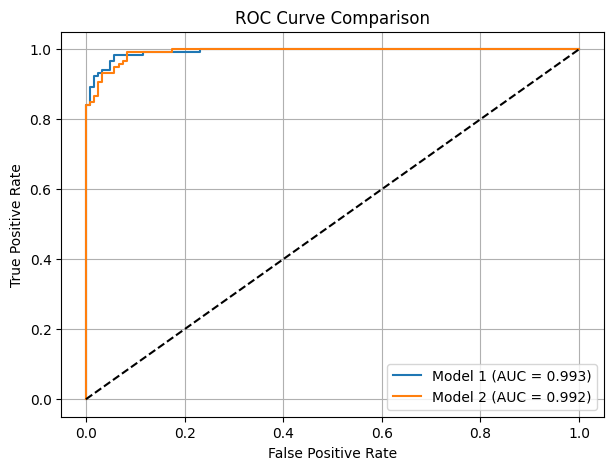

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test, y_pred1_prob)
fpr2, tpr2, _ = roc_curve(y_test, y_pred2_prob)

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(7,5))
plt.plot(fpr1, tpr1, label=f"Model 1 (AUC = {auc1:.3f})")
plt.plot(fpr2, tpr2, label=f"Model 2 (AUC = {auc2:.3f})")

plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


Classification Report for Model 1:
                    0           1  accuracy   macro avg  weighted avg
precision    0.966387    0.950413  0.958333    0.958400      0.958466
recall       0.950413    0.966387  0.958333    0.958400      0.958333
f1-score     0.958333    0.958333  0.958333    0.958333      0.958333
support    121.000000  119.000000  0.958333  240.000000    240.000000

Classification Report for Model 2:
                    0           1  accuracy   macro avg  weighted avg
precision    0.957627    0.934426  0.945833    0.946027      0.946123
recall       0.933884    0.957983  0.945833    0.945934      0.945833
f1-score     0.945607    0.946058  0.945833    0.945832      0.945831
support    121.000000  119.000000  0.945833  240.000000    240.000000



<Figure size 500x400 with 0 Axes>

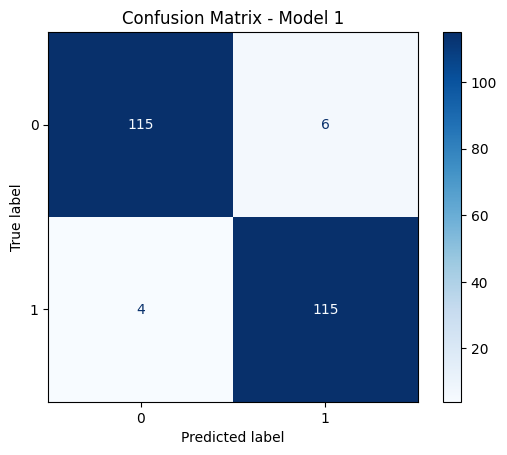

<Figure size 500x400 with 0 Axes>

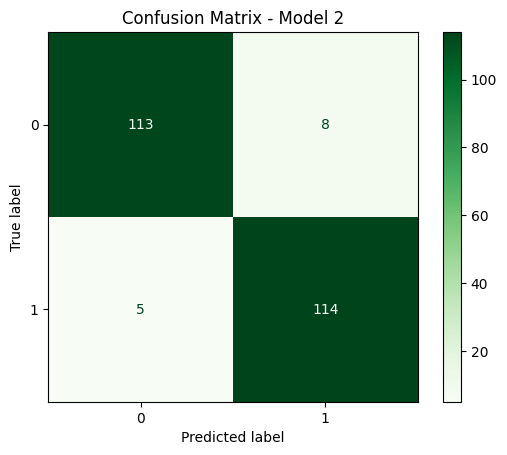

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("Classification Report for Model 1:")
df_cr1 = pd.DataFrame(classification_report(y_test, y_pred1, output_dict=True))
print(df_cr1)

print("\nClassification Report for Model 2:")
df_cr2 = pd.DataFrame(classification_report(y_test, y_pred2, output_dict=True))
print(df_cr2)
print()
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm1).plot(cmap='Blues')
plt.title("Confusion Matrix - Model 1")
plt.show()

plt.figure(figsize=(5,4))
ConfusionMatrixDisplay(cm2).plot(cmap='Greens')
plt.title("Confusion Matrix - Model 2")
plt.show()
